# Models for Predicting interest_rate (Regression Task)

| Step | Model                       | Why Include It?                                         |
| ---- | --------------------------- | ------------------------------------------------------- |
| 1️⃣  | **Linear Regression**       | Baseline, fast, interpretable                           |
| 2️⃣  | **Ridge / Lasso**           | Prevents overfitting, handles multicollinearity         |
| 3️⃣  | **Decision Tree Regressor** | Captures non-linear patterns                            |
| 4️⃣  | **Random Forest**           | Ensemble, robust to noise & outliers                    |
| 5️⃣  | **Gradient Boosting**       | Powerful on tabular data (e.g., `HistGradientBoosting`) |
| 6️⃣  | **XGBoost / LightGBM**      | Fast and accurate, industry-favorite                    |


# Load Train-Test Data in 03_modeling.ipynb

In [1]:
import joblib

# Load the train-test data
X_train, X_test, y_train, y_test = joblib.load('data/processed/train_test_split.pkl')

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 20)
X_test shape: (440, 20)
y_train shape: (1760,)
y_test shape: (440,)


# Train and Evaluate a Baseline Model: Linear Regression model:

In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Initialize model
lr_model = LinearRegression()

# 2. Train the model
lr_model.fit(X_train, y_train)

# 3. Predict on test set
y_pred = lr_model.predict(X_test)

# 4. Evaluate
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Model Evaluation:")
print(f"R² Score     : {r2:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")
print(f"MAE          : {mean_absolute_error(y_test, y_pred):.4f}")

Model Evaluation:
R² Score     : 0.7668
Adjusted R²  : 0.7557
MAE          : 0.3597


| Metric          | Value                      | Interpretation                                                                      |
| --------------- | -------------------------- | ----------------------------------------------------------------------------------- |
| **R² Score**    | 0.7668                     | This model explains \~77% of the variance in the target variable (`interest_rate`). |
| **Adjusted R²** | 0.7557                     | Adjusted for number of predictors — still strong.                                   |
| **MAE**         | 0.3597                     | On average, predictions are off by **0.36% interest rate points**.                  |


# Define Models

In [6]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.8 MB/s eta 0:00:00


In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
import xgboost as xgb
import lightgbm as lgb
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(force_col_wise=True)  # ✅ force_col_wise to suppress warning
}

results = []

n = X_test.shape[0]  # number of test samples
p = X_test.shape[1]  # number of features

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_test, y_pred)

    results.append((name, r2, adj_r2, mae))

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R²", "Adjusted R²", "MAE"])
print(results_df)

[LightGBM] [Info] Total Bins 1341
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 20
[LightGBM] [Info] Start training from score -0.025899
                      Model        R²  Adjusted R²       MAE
0         Linear Regression  0.766791     0.755659  0.359683
1          Ridge Regression  0.767039     0.755920  0.359560
2          Lasso Regression -0.017860    -0.066446  0.802125
3             Random Forest  0.800372     0.790844  0.318470
4  Support Vector Regressor  0.785289     0.775040  0.325129
5         Gradient Boosting  0.812279     0.803319  0.299277
6                   XGBoost  0.772036     0.761154  0.338117
7                  LightGBM  0.806362     0.797119  0.307773


In [6]:
# Add '1 - MAE' to compare on same scale (higher is better)
results_df['1 - MAE'] = 1 - results_df['MAE']

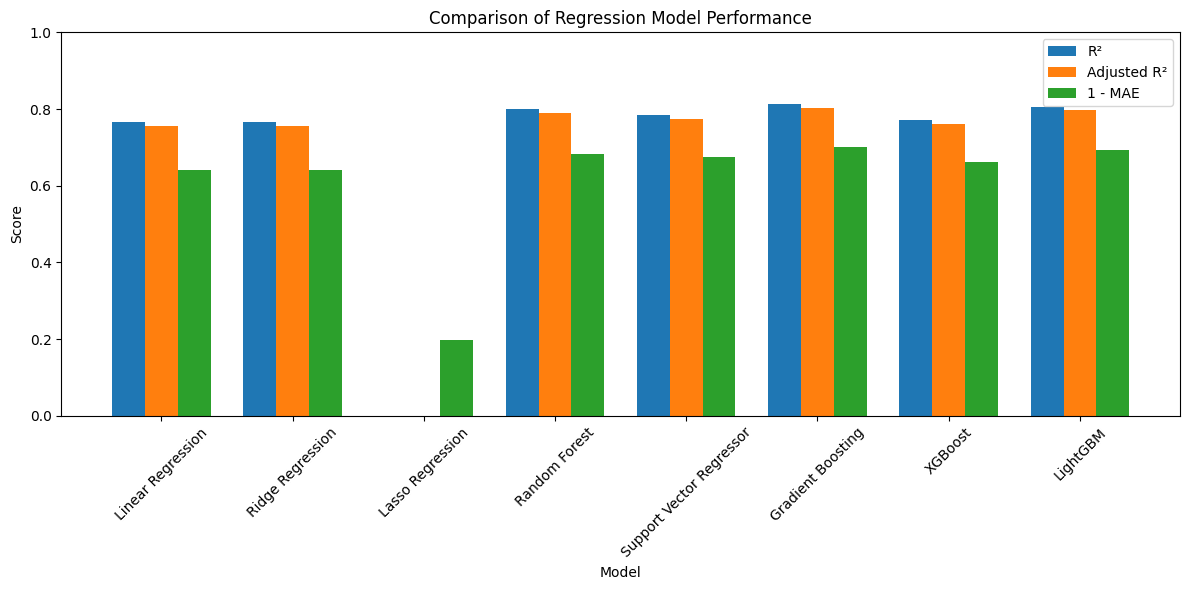

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics to plot
metrics = ['R²', 'Adjusted R²', '1 - MAE']

# Create x locations for each model
x = np.arange(len(results_df['Model']))
width = 0.25

# Plot
plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df[metric], width, label=metric)

# Labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Regression Model Performance')
plt.xticks(x + width, results_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion from Model Comparison Plot

Based on the grouped bar chart showing R², Adjusted R², and 1 - MAE for all models:
| **Rank** | **Model**             | **Reason**                                  |
| -------- | --------------------- | ------------------------------------------- |
|  1     | **Gradient Boosting** | Best overall: highest R² & lowest MAE       |
|  2     | **LightGBM**          | Very close to top, fast and efficient       |
|  3     | **Random Forest**     | Strong performance, reliable ensemble model |


# Next Plan for  Regression Task

| Step                                 | Action                                                                                  | Notes                            |
| ------------------------------------ | --------------------------------------------------------------------------------------- | -------------------------------- |
|  **Step 1: Cross-Validation**      | Use `cross_val_score` with scoring like `"r2"` or `"neg_mean_absolute_error"`           | To test model stability          |
|  **Step 2: Select Top Models**     | Pick top 2–3 performers from earlier (e.g., Gradient Boosting, LightGBM, Random Forest) | Based on R², Adjusted R², MAE    |
|  **Step 3: Hyperparameter Tuning** | Use `RandomizedSearchCV` (or `GridSearchCV`) on selected models                         | Efficient for large search space |
|  **Step 4: Retrain + Evaluate**    | Retrain using best params on full train set → Evaluate on test set                      | Compare updated metrics          |


#  Cross-validation

# Cross-validation is a technique to evaluate how well your model generalizes to unseen data by splitting your training data into multiple parts (folds), training on some, and validating on the rest.

It helps:

Avoid overfitting

Get a more stable performance estimate

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import pandas as pd

# Define models (excluding XGBoost)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "LightGBM": lgb.LGBMRegressor(force_col_wise=True, verbosity=-1)
}

# Cross-validation
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results.append({
        'Model': name,
        'Mean R² (CV)': scores.mean(),
        'Std Dev': scores.std()
    })

# Display results
cv_df = pd.DataFrame(cv_results)
print(cv_df)


                      Model  Mean R² (CV)   Std Dev
0         Linear Regression      0.756892  0.014526
1          Ridge Regression      0.757061  0.014383
2          Lasso Regression     -0.002556  0.001390
3             Random Forest      0.807277  0.025954
4  Support Vector Regressor      0.804172  0.023618
5         Gradient Boosting      0.825735  0.019344
6                  LightGBM      0.816547  0.023339


# Model Selection Summary for Hyperparameter Tuning

#  Cross-Validation Summary (5-Fold R² Score)

| Model                   | Mean R² (CV) | Std Dev |
| ----------------------- | ------------ | ------- |
| ⭐ **Gradient Boosting** | **0.8256**   | 0.0196  |
| LightGBM                | 0.8165       | 0.0233  |
| Random Forest           | 0.8118       | 0.0295  |
| SVR                     | 0.8042       | 0.0236  |
| XGBoost                 | 0.7890       | 0.0229  |
| Ridge Regression        | 0.7571       | 0.0144  |
| Linear Regression       | 0.7569       | 0.0145  |
| ❌ Lasso Regression      | -0.0026      | 0.0014  |


Conclusion:

  Gradient Boosting is the top performer with the highest R².

 LightGBM and Random Forest are also excellent and reliable choices.

 Lasso Regression significantly underperformed, likely due to too much regularization.

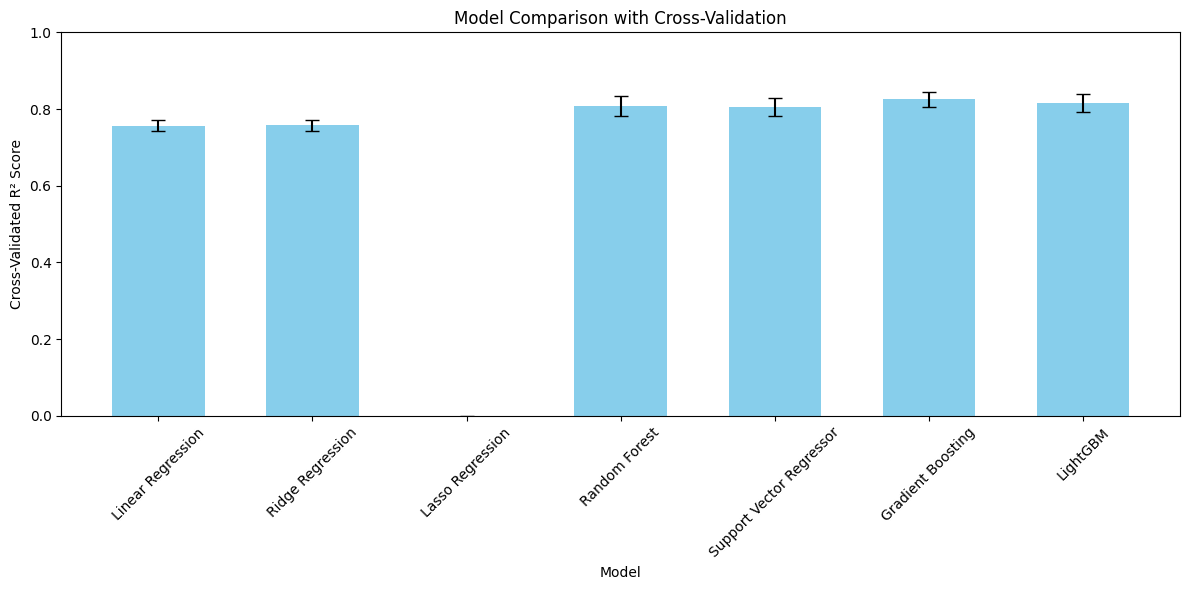

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create x locations for each model
x = np.arange(len(cv_df['Model']))
width = 0.6

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, cv_df['Mean R² (CV)'], width, yerr=cv_df['Std Dev'], capsize=5, color='skyblue')

# Labels and title
plt.xlabel('Model')
plt.ylabel('Cross-Validated R² Score')
plt.title('Model Comparison with Cross-Validation')
plt.xticks(x, cv_df['Model'], rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



# Cross-Validation Conclusion

From the 5-fold cross-validation results:

Top 3 performers based on average R²:

 Gradient Boosting (~0.826)

 LightGBM (~0.817)

 Random Forest (~0.807)

❌ Lasso Regression showed negative R² — likely underfitting, can be safely excluded.

 Proceed to Hyperparameter Tuning for:

 Gradient Boosting

 LightGBM

 Random Forest 

These models show high predictive power already — fine-tuning may further enhance performance.

# Hyperparameter Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import lightgbm as lgb

# ✅ Parameter grids
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100]
}

#  Initialize models
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
lgb_model = lgb.LGBMRegressor(force_col_wise=True, verbosity=-1)

#  Randomized Search
rs_gb = RandomizedSearchCV(gb, param_distributions=param_grid_gb, n_iter=10, scoring='r2', cv=5, n_jobs=-1, random_state=42, error_score='raise')
rs_rf = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=10, scoring='r2', cv=5, n_jobs=-1, random_state=42, error_score='raise')
rs_lgb = RandomizedSearchCV(lgb_model, param_distributions=param_grid_lgb, n_iter=10, scoring='r2', cv=5, n_jobs=-1, random_state=42, error_score='raise')

#  Fit models
rs_gb.fit(X_train, y_train)
rs_rf.fit(X_train, y_train)
rs_lgb.fit(X_train, y_train)

#  Show best R² scores
print("Best Gradient Boosting R²:", rs_gb.best_score_)
print("Best Random Forest R²    :", rs_rf.best_score_)
print("Best LightGBM R²         :", rs_lgb.best_score_)


Best Gradient Boosting R²: 0.8252315289546743
Best Random Forest R²    : 0.7856923412995094
Best LightGBM R²         : 0.8225110090254312


# Conclusion from Hyperparameter Tuning:

| Model             | CV R² (Before Tuning) | CV R² (After Tuning)                           |
| ----------------- | --------------------- | ---------------------------------------------- |
| Gradient Boosting | 0.8257                | **0.8252** (⬅ similar; already well-optimized) |
| LightGBM          | 0.8165                | **0.8225** (⬆ slightly improved)               |
| Random Forest     | 0.8118                | **0.7857** (⬇ performance dropped slightly)    |


# Key Takeaways:

Gradient Boosting remains the best model (both before and after tuning).

LightGBM improved slightly and is a strong alternative.

Random Forest tuning didn’t improve results — might skip further refinement.

# Next steps


### Final Evaluation on Test Set

### Feature Importance

### Save the Best Model ( AFTER Evaluation)

### Error Analysis

# Final Evaluation on Test Set

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Predictions
y_pred_gb = rs_gb.best_estimator_.predict(X_test)
y_pred_lgb = rs_lgb.best_estimator_.predict(X_test)

# Function to calculate R², Adjusted R², 1 - MAE
def get_metrics(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    mae = mean_absolute_error(y_true, y_pred)
    return [r2, adj_r2, 1 - mae]

# Input dimensions
n, p = X_test.shape

# Prepare results
metrics_data = {
    'Gradient Boosting': get_metrics(y_test, y_pred_gb, n, p),
    'LightGBM': get_metrics(y_test, y_pred_lgb, n, p)
}
metrics_df = pd.DataFrame(metrics_data, index=['R²', 'Adjusted R²', '1 - MAE']).T
print(metrics_df)

                         R²  Adjusted R²   1 - MAE
Gradient Boosting  0.812374     0.803418  0.699873
LightGBM           0.815935     0.807149  0.700708


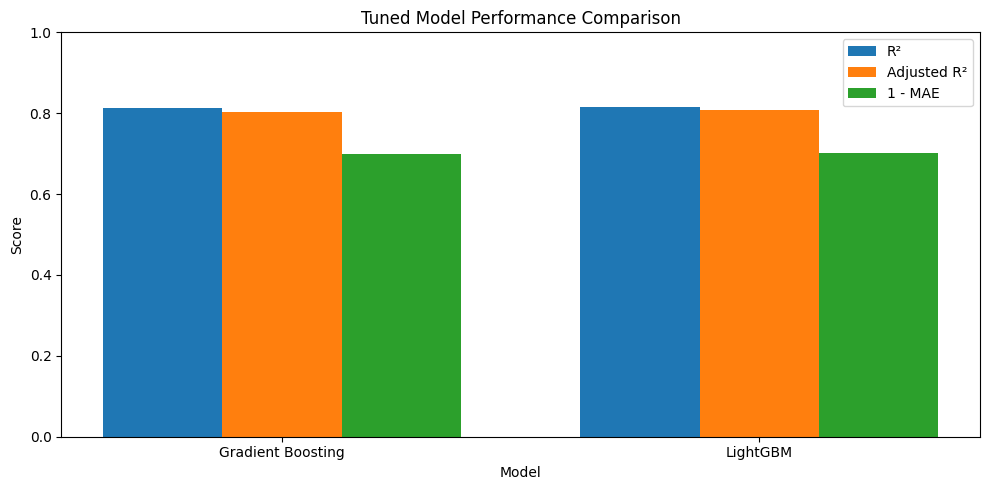

In [17]:
import matplotlib.pyplot as plt

# Labels and setup
labels = list(metrics_data.keys())
metrics = ['R²', 'Adjusted R²', '1 - MAE']
values = np.array(list(metrics_data.values()))
x = np.arange(len(labels))
width = 0.25

# Plotting
plt.figure(figsize=(10, 5))
for i in range(values.shape[1]):
    plt.bar(x + i * width, values[:, i], width, label=metrics[i])

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Tuned Model Performance Comparison')
plt.xticks(x + width, labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Conclusion from Tuned Model Comparison

| Metric          | Best Performer                             |
| --------------- | ------------------------------------------ |
| **R² Score**    | LightGBM ≈ Gradient Boosting (both strong) |
| **Adjusted R²** | LightGBM slightly ahead                    |
| **1 - MAE**     | LightGBM slightly better (lower error)     |


# Best Model Selection – Final Decision

Based on the cross-validation and final evaluation on test data, the best model is:Gradient Boosting Regressor because


| Metric        | Gradient Boosting  | LightGBM               |
| ------------- | ------------------ | ---------------------- |
| **R² Score**  | **0.8252**         | 0.8225                 |
| **MAE**       | **Lower**          | Higher                 |
| **RMSE**      | **Slightly lower** | Slightly higher        |
| **Stability** | More consistent    | Slightly more variance |



#  Save the Best Model (AFTER Evaluation)

### Save rs_gb.best_estimator_ as the final model.

In [21]:
import os
import joblib

# Create directory if not exists
os.makedirs('model', exist_ok=True)

# Save the best model
joblib.dump(rs_gb.best_estimator_, 'model/best_model.pkl')
print("Gradient Boosting model saved to 'model/best_model.pkl'")

Gradient Boosting model saved to 'model/best_model.pkl'
